# Structure

In [1]:
import pandas as pd
import yfinance as yh
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
Year = 252 # trading days on a year

In [2]:
# Download and save GBPEUR,

In [3]:
data=yh.download("GBPEUR=X",start = "2012-01-01",end = "2022-01-02")

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,1.19740,1.19950,1.19610,1.19740,1.19740,0
2012-01-03,1.19920,1.19980,1.19430,1.19910,1.19910,0
2012-01-04,1.19820,1.20960,1.19780,1.19820,1.19820,0
2012-01-05,1.20690,1.21100,1.20630,1.20670,1.20670,0
2012-01-06,1.21130,1.21330,1.20960,1.21130,1.21130,0
...,...,...,...,...,...,...
2021-12-27,1.18351,1.18693,1.18230,1.18344,1.18344,0
2021-12-28,1.18620,1.18998,1.18540,1.18629,1.18629,0
2021-12-29,1.18730,1.18995,1.18700,1.18710,1.18710,0


In [5]:
df=data[["Close"]]

In [6]:
df.to_csv("GBPEUR=X.cvs")

In [7]:
df = pd.read_csv("GBPEUR=X.cvs", parse_dates=["Date"], index_col= "Date")

In [8]:
df

,Close
Date,
2012-01-02,1.19740
2012-01-03,1.19910
2012-01-04,1.19820
2012-01-05,1.20670
2012-01-06,1.21130
...,...
2021-12-27,1.18344
2021-12-28,1.18629
2021-12-29,1.18710


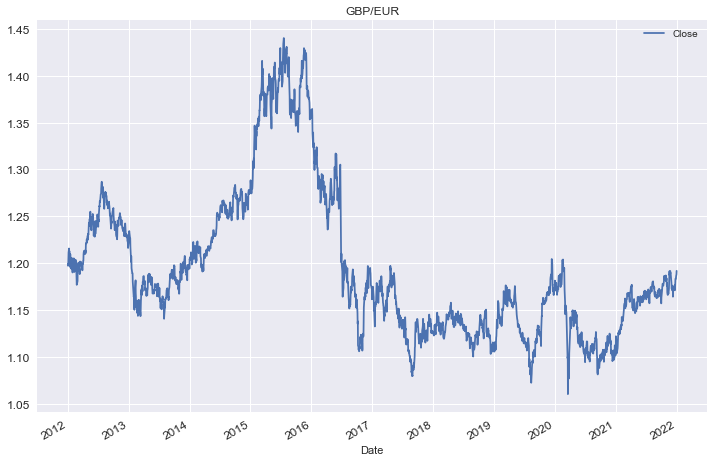

In [9]:
df.plot(figsize = (12,8), title ="GBP/EUR", fontsize = 12)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2012-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2608 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


In [11]:
df["Returns"]= np.log(df.div(df.shift(1)))

In [12]:
df

,Close,Returns
Date,,
2012-01-02,1.19740,NaN
2012-01-03,1.19910,0.001419
2012-01-04,1.19820,-0.000751
2012-01-05,1.20670,0.007069
2012-01-06,1.21130,0.003805
...,...,...
2021-12-27,1.18344,0.000034
2021-12-28,1.18629,0.002405
2021-12-29,1.18710,0.000683


# Buy and Hold
buy it and sell it after, to test different types of graph

In [13]:
df.dropna(inplace= True)
df

,Close,Returns
Date,,
2012-01-03,1.19910,0.001419
2012-01-04,1.19820,-0.000751
2012-01-05,1.20670,0.007069
2012-01-06,1.21130,0.003805
2012-01-09,1.21570,0.003626
...,...,...
2021-12-27,1.18344,0.000034
2021-12-28,1.18629,0.002405
2021-12-29,1.18710,0.000683


Text(0.5, 1.0, 'GBP / EUR returns')

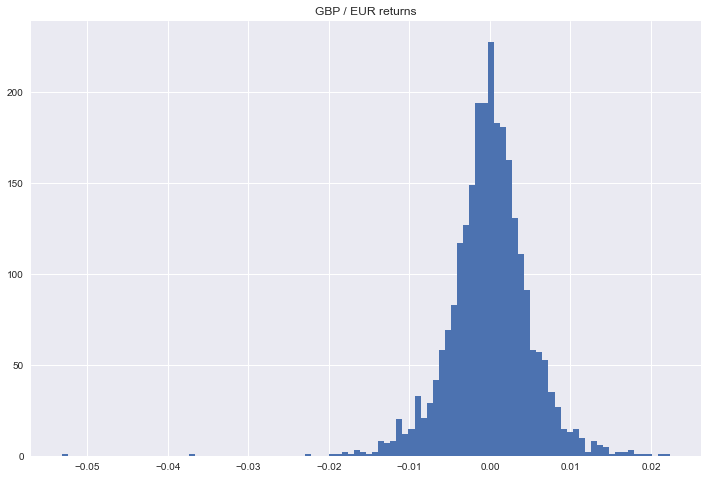

In [14]:
#Creating a histogram
df.Returns.hist(bins=100, figsize= (12,8))
plt.title("GBP / EUR returns")

In [15]:
df.Returns.sum()

-0.004687749795877633

In [16]:
np.exp(df.Returns.sum())# final value if creater than 1 it creates a benefit

0.9953232205544166

In [17]:
df.Returns.cumsum()

Date
2012-01-03    0.001419
2012-01-04    0.000668
2012-01-05    0.007737
2012-01-06    0.011542
2012-01-09    0.015168
                ...   
2021-12-27   -0.011727
2021-12-28   -0.009322
2021-12-29   -0.008639
2021-12-30   -0.007848
2021-12-31   -0.004688
Name: Returns, Length: 2607, dtype: float64

In [18]:
df["Cumulative"] = df.Returns.cumsum().apply(np.exp)
df

,Close,Returns,Cumulative
Date,,,
2012-01-03,1.19910,0.001419,1.001420
2012-01-04,1.19820,-0.000751,1.000668
2012-01-05,1.20670,0.007069,1.007767
2012-01-06,1.21130,0.003805,1.011609
2012-01-09,1.21570,0.003626,1.015283
...,...,...,...
2021-12-27,1.18344,0.000034,0.988341
2021-12-28,1.18629,0.002405,0.990722
2021-12-29,1.18710,0.000683,0.991398


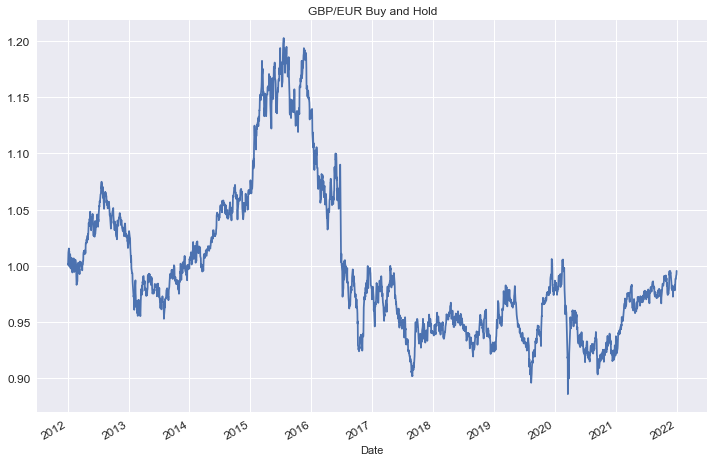

In [19]:
df.Cumulative.plot(figsize = (12,8), title ="GBP/EUR Buy and Hold", fontsize = 12)
plt.show()

# Performance

In [20]:
df.Cumulative.iloc[-1] # Cumulative absolute performance

0.9953232205544164

In [21]:
df.Returns.sum() # Return absolute performance

-0.004687749795877633

In [22]:
df.describe()

,Close,Returns,Cumulative
count,2607.000000,2607.000000,2607.000000
mean,1.195343,-0.000002,0.998282
std,0.080011,0.004979,0.066821
min,1.060330,-0.053203,0.885527
25%,1.136825,-0.002603,0.949411
50%,1.172260,0.000036,0.979005
75%,1.239450,0.002718,1.035118
max,1.440300,0.022388,1.202856


In [23]:
df.Returns.mean()*Year #mean return in a year

-0.0004531311655394017

In [24]:
df.Returns.std()*np.sqrt(Year) # Risk 

0.07904414288092416

In [25]:
df["MaxCumulative"]=df.Cumulative.cummax()

In [26]:
df

,Close,Returns,Cumulative,MaxCumulative
Date,,,,
2012-01-03,1.19910,0.001419,1.001420,1.001420
2012-01-04,1.19820,-0.000751,1.000668,1.001420
2012-01-05,1.20670,0.007069,1.007767,1.007767
2012-01-06,1.21130,0.003805,1.011609,1.011609
2012-01-09,1.21570,0.003626,1.015283,1.015283
...,...,...,...,...
2021-12-27,1.18344,0.000034,0.988341,1.202856
2021-12-28,1.18629,0.002405,0.990722,1.202856
2021-12-29,1.18710,0.000683,0.991398,1.202856


<AxesSubplot:title={'center':'GBP/EUR Max Drawdown'}, xlabel='Date'>

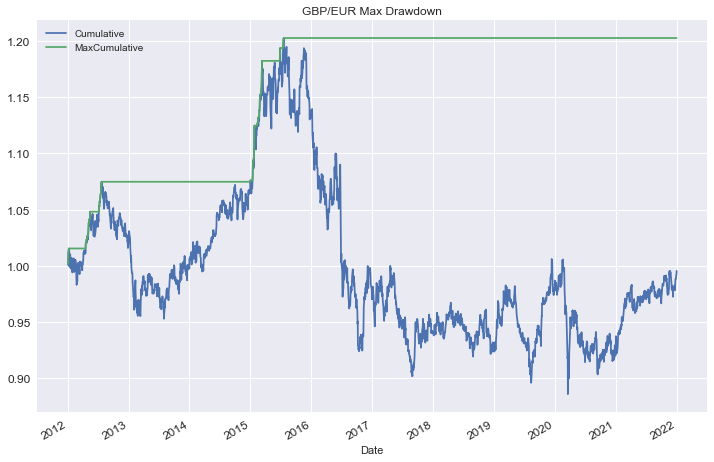

In [27]:
df[["Cumulative","MaxCumulative"]].dropna().plot(figsize = (12,8), title ="GBP/EUR Max Drawdown", fontsize = 12)

In [28]:
drawdown = df["MaxCumulative"]-df["Cumulative"]

In [29]:
drawdown.max()

0.31732918221370077

In [30]:
drawdown.min()

0.0

In [31]:
drawdown.idxmax()

Timestamp('2020-03-19 00:00:00')

In [32]:
drawdown.idxmin()

Timestamp('2012-01-03 00:00:00')